# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [2]:
df['coast'].unique()

array(['GULF', 'EAST', 'WEST'], dtype=object)

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('/Users/liamzeeum/Github/assignment-5/data/tidal_wetland_estuaries.csv')
df = df.replace(-9999, np.NaN)
df.columns
df_east = df.loc[(df['coast'] == 'EAST')]
df_west = df.loc[(df['coast']=='WEST')]
stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative='greater', nan_policy='omit')


Ttest_indResult(statistic=8.45031778669312, pvalue=5.765284478012742e-13)

I chose a 2 sample 1-tailed T-test because I am comparing 2 samples and testing whether the data supports the null hypothesis the true means of the populations from which the samples are taken are the same with the alternative that one is greater than the other. Because I am only testing for whether one is greater I use a 1 tailed test. The p-value of the t-test tells me that there is an exceedingly small chance that these data result from two populations that have the same mean so I reject the null and accept the alternative hypothesis.

The histograms below shows that the data for the east coast is much more normal than the data from the west coast, but the west coast data probably does come from a normally distributed population anyway.

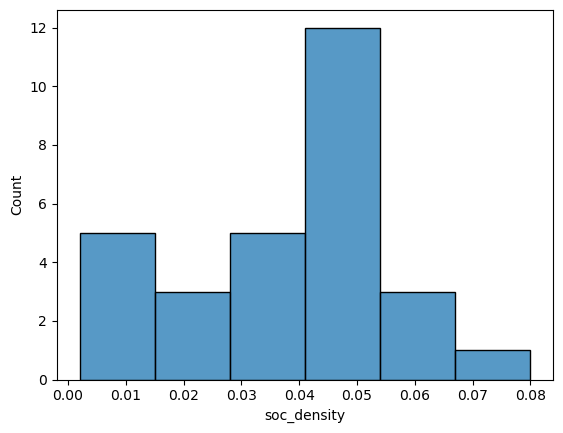

In [5]:

sns.histplot(df_west['soc_density'])
plt.show()



<AxesSubplot:xlabel='soc_density', ylabel='Count'>

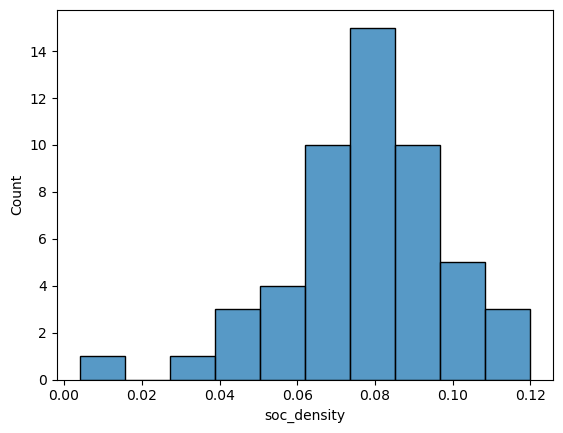

In [6]:
sns.histplot(df_east['soc_density'])

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [15]:
from utils import Linear_Reg_Diagnostic # do not change!

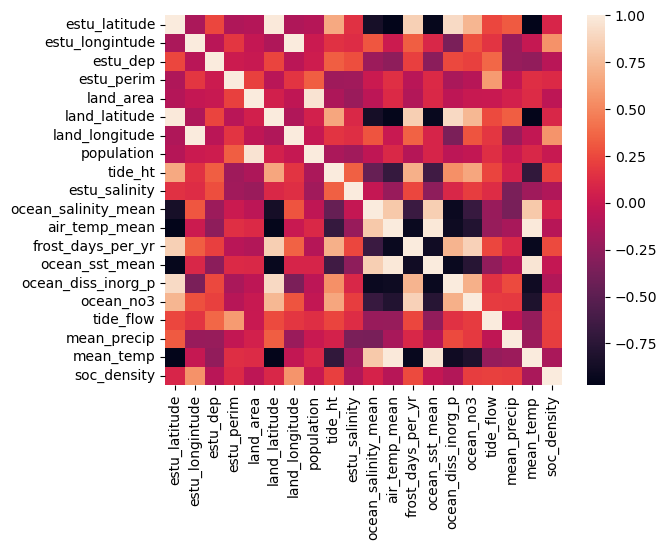

In [9]:
df.columns
correlations = df.corr()

sns.heatmap(correlations)
plt.xticks(rotation=90)
plt.show()

In [13]:
import statsmodels.formula.api as smf
model = smf.ols(formula='ocean_salinity_mean ~  land_latitude + air_temp_mean + ocean_sst_mean + ocean_diss_inorg_p + ocean_no3',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.882
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     162.1
Date:                 Tue, 25 Apr 2023   Prob (F-statistic):           1.60e-48
Time:                         22:34:25   Log-Likelihood:                -95.326
No. Observations:                  114   AIC:                             202.7
Df Residuals:                      108   BIC:                             219.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             45.7737      1.666     27.474      0.000      42.471      49.076
land_latitude         -0.1835      0.032     -5.717      0.000      -0.247      -0.120
air_temp_mean         -0.3522      0.065     -5.402      0.000      -0.481      -0.223
ocean_sst_mean         0.1415      0.048      2.947      0.004       0.046       0.237
ocean_diss_inorg_p    -6.4068      0.881     -7.276      0.000      -8.152      -4.661
ocean_no3             -0.2460      0.072     -3.413      0.001      -0.389      -0.103
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                3.403
Skew:                          -0.010   Prob(JB):                        0.182
Kurtosis:                       3.846   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
diag = Linear_Reg_Diagnostic(model)
diag.vif_table()

             Features  VIF Factor
5           ocean_no3        2.72
4  ocean_diss_inorg_p        8.30
1       land_latitude       14.48
3      ocean_sst_mean       31.89
2       air_temp_mean       43.53
0           Intercept      961.56


In [22]:
model2 = smf.ols(formula='ocean_salinity_mean ~ ocean_diss_inorg_p',data=df).fit()
print(model2.summary())
diag2= Linear_Reg_Diagnostic(model2)
print(diag2.vif_table())

                             OLS Regression Results                            
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.835
Method:                  Least Squares   F-statistic:                     571.3
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           8.55e-46
Time:                         09:40:36   Log-Likelihood:                -114.27
No. Observations:                  114   AIC:                             232.5
Df Residuals:                      112   BIC:                             238.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             36.4

Model 2 is my final model. The summary of the model tells me that the model explains 83.8% of the variation in the dependent variable because the adjusted r-squared is .838. The coefficient on ocean_diss_inorg_p is -8.4724 which tells me the model predicts for every unit increase in ocean_diss_inorg_p there will be a 8.4724 unit decrease in ocean_salinity_mean. 

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

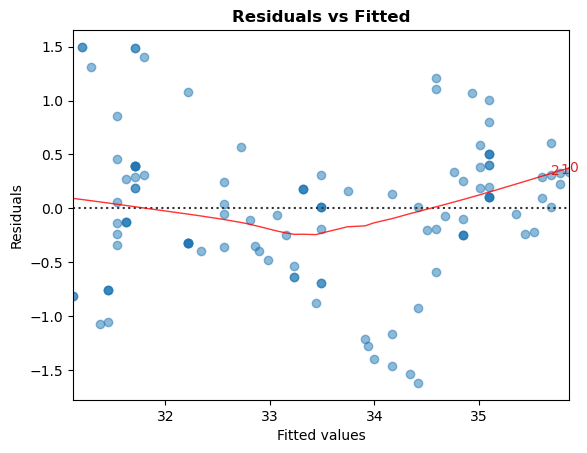

In [23]:
diag2.residual_plot()

<AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

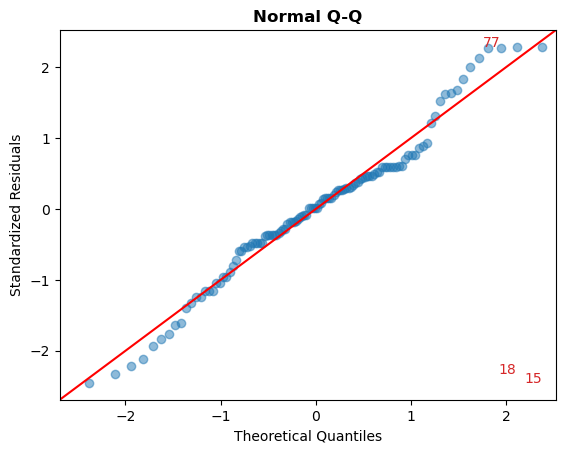

In [24]:
diag2.qq_plot()

<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

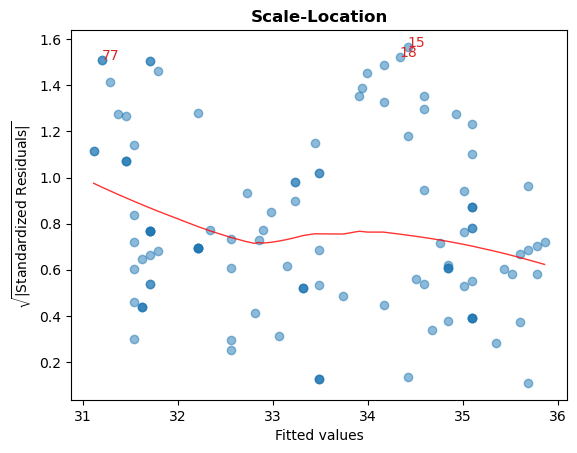

In [25]:
diag2.scale_location_plot()

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [34]:
df_coal = pd.read_csv('/Users/liamzeeum/Github/assignment-5/data/coal-production.csv')

df_coal.head()
df_coal['year'] = pd.to_datetime(df_coal['year'], format='%Y')
df_coal= df_coal.set_index('year').sort_index()
df_coal.head()



,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


Text(0, 0.5, 'Electricty Production Share From Coal')

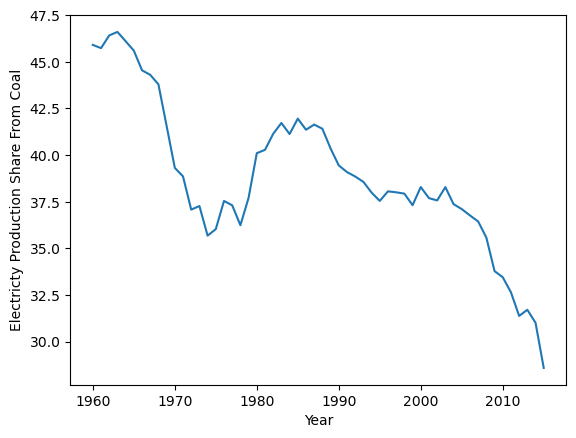

In [35]:
figure, ax = plt.subplots()
ax.plot(df_coal['electricity_prod'])
ax.set_xlabel('Year')
ax.set_ylabel('Electricty Production Share From Coal')

There seems to be a generally downard trend in the data.

In [36]:
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df_coal)

ADF Statistic: 1.872154432675823
p-value: 0.9984818799941668


Since the p-value is above .05 we cannot reject the null hypothesis that the data is not stationary.

In [40]:
import pmdarima as pm

auto_arima = pm.auto_arima(df_coal['electricity_prod'])
auto_arima.summary()

/Users/liamzeeum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liamzeeum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liamzeeum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/liamzeeum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/liamzeeum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  ret

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Wed, 26 Apr 2023   AIC                            149.368
Time:                        10:12:06   BIC                            155.390
Sample:                             0   HQIC                           151.697
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Running an Auto-Arima foound a SARIMAX(1,1,1) model to be the best fit. This has 1 autoregressive term, 1 moving average term and one sigma2 term (is this Integrated?).

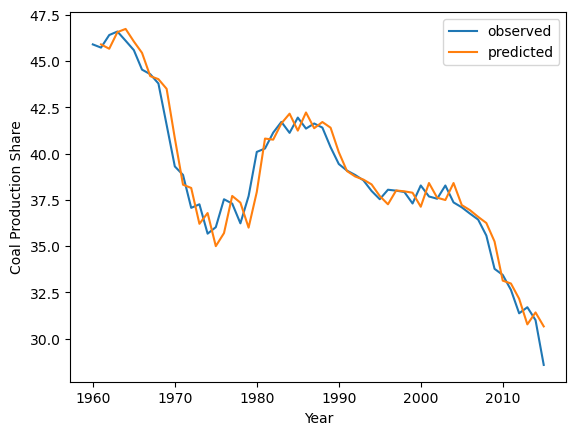

In [41]:
in_samp_pred = auto_arima.predict_in_sample()

fig, ax = plt.subplots()
ax.plot(df_coal, label='observed')
ax.plot(df_coal.index[1:],in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Coal Production Share')
ax.legend();

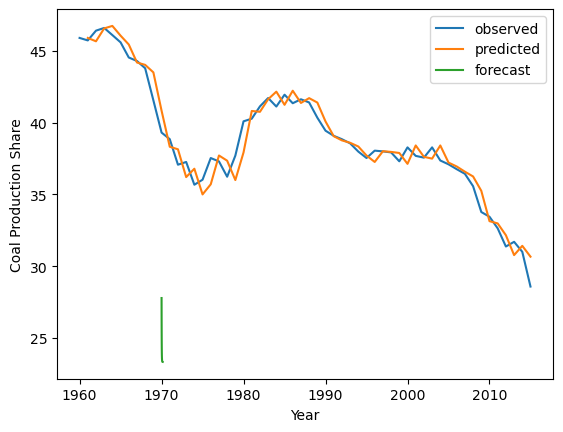

In [45]:
forecast = auto_arima.predict(50)

fig, ax = plt.subplots()
ax.plot(df_coal, label='observed')
ax.plot(df_coal.index[1:],in_samp_pred[1:], label='predicted')
ax.plot(forecast, label = 'forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Coal Production Share')
ax.legend();